In [1]:
# load data
import pandas as pd

In [2]:
df = pd.read_csv("cars.csv")

In [3]:
df

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.
...,...,...,...,...,...,...,...,...
256,17.0,8,305,130,3840,15,1980,US.
257,36.1,4,91,60,1800,16,1979,Japan.
258,22.0,6,232,112,2835,15,1983,US.
259,18.0,6,232,100,3288,16,1972,US.


In [4]:
df.describe()

,mpg,cylinders,hp,time-to-60,year
count,261.000000,261.000000,261.000000,261.000000,261.000000
mean,23.144828,5.590038,106.360153,15.547893,1976.819923
std,7.823570,1.733310,40.499959,2.910625,3.637696
min,10.000000,3.000000,46.000000,8.000000,1971.000000
25%,16.900000,4.000000,75.000000,14.000000,1974.000000
50%,22.000000,6.000000,95.000000,16.000000,1977.000000
75%,28.800000,8.000000,138.000000,17.000000,1980.000000
max,46.600000,8.000000,230.000000,25.000000,1983.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           261 non-null    float64
 1    cylinders    261 non-null    int64  
 2    cubicinches  261 non-null    object 
 3    hp           261 non-null    int64  
 4    weightlbs    261 non-null    object 
 5    time-to-60   261 non-null    int64  
 6    year         261 non-null    int64  
 7    brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


# EDA

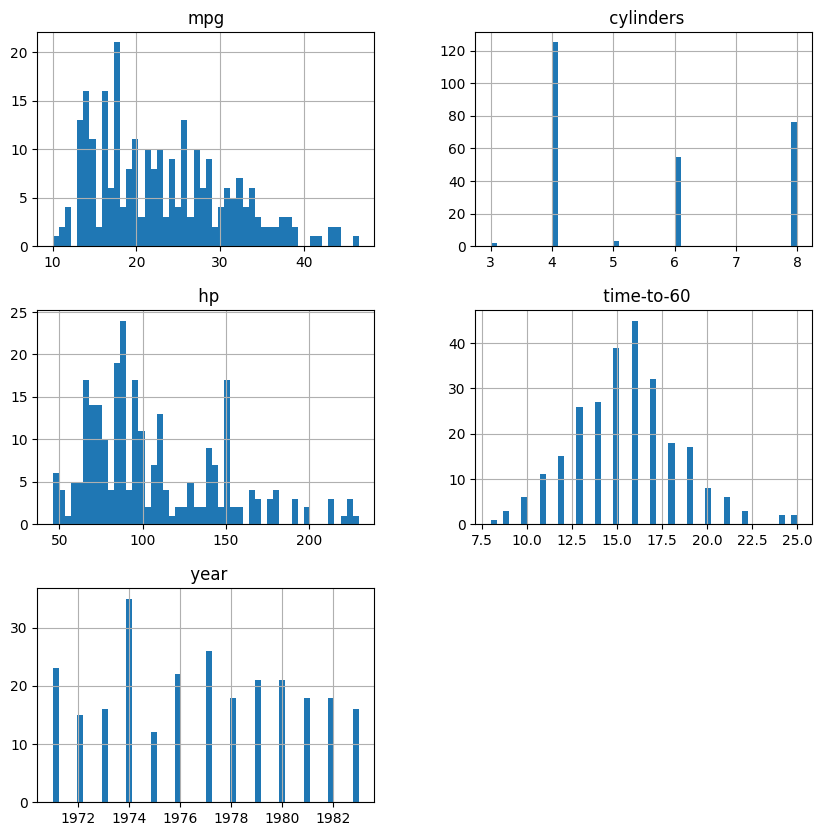

In [6]:
_ = df.hist(figsize=(10,10), bins=50)

From the above results, there is no need to fill data.

# Normalize dataset

In [7]:
# fix columns names
df.columns = list(map(lambda x: x.strip(" "), df.columns))
df.columns

Index(['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60',
       'year', 'brand'],
      dtype='object')

In [8]:
# Bin age of the car
df["year_bin"] = pd.cut(df["year"], 5)
df["year_bin"].value_counts()

(1975.8, 1978.2]      66
(1970.988, 1973.4]    54
(1980.6, 1983.0]      52
(1973.4, 1975.8]      47
(1978.2, 1980.6]      42
Name: year_bin, dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le = LabelEncoder()
df["year"] = le.fit_transform(df["year_bin"])
df.drop("year_bin", axis=1, inplace=True)

In [11]:
set(df.brand)

{' Europe.', ' Japan.', ' US.'}

In [12]:
le = LabelEncoder()
df["brand"] = le.fit_transform(df["brand"])

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df = sc.fit_transform(df)

ValueError: could not convert string to float: ' '

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    object 
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    object 
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 16.4+ KB


In [17]:
# cubicinches and weightlbs also may have some strings in the data

In [18]:
import numpy as np
def find_empty_string(data):
    if data == '' or data == ' ':
        return np.nan
    else:
        return data

In [19]:
df.cubicinches = df.cubicinches.apply(find_empty_string)
df.weightlbs = df.weightlbs.apply(find_empty_string)

In [20]:
df.weightlbs.apply(find_empty_string).isna().sum()

3

In [21]:
df[df.weightlbs.apply(find_empty_string).isna()]

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
14,19.1,6,225,90,NaN,19,4,2
33,21.0,6,199,90,NaN,15,0,2
172,29.0,4,68,49,NaN,20,1,0


In [22]:
df.cubicinches.apply(find_empty_string).isna().sum()

2

In [23]:
df.cubicinches.astype(int)

ValueError: cannot convert float NaN to integer

In [24]:
data = []
for i in df.cubicinches:
    try:
        data.append(int(i))
    except:
        print(i)

nan
nan


In [25]:
cilinder_average = sum(data)/len(data)

In [26]:
df.cubicinches = df.cubicinches.fillna(cilinder_average).astype(int)

In [27]:
data = []
for i in df.weightlbs:
    try:
        data.append(int(i))
    except:
        print(i)


nan
nan
nan


In [28]:
weightlbs_average = sum(data)/len(data)

In [29]:
weightlbs_average

3009.8333333333335

In [30]:
df.weightlbs = df.weightlbs.fillna(weightlbs_average).astype(int)

In [31]:
df

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,0,2
1,31.9,4,89,71,1925,14,3,0
2,17.0,8,302,140,3449,11,0,2
3,15.0,8,400,150,3761,10,0,2
4,30.5,4,98,63,2051,17,2,2
...,...,...,...,...,...,...,...,...
256,17.0,8,305,130,3840,15,3,2
257,36.1,4,91,60,1800,16,3,1
258,22.0,6,232,112,2835,15,4,2
259,18.0,6,232,100,3288,16,0,2


In [32]:
sc = StandardScaler()
df = sc.fit_transform(df)

# Apply TSNE

In [33]:
from sklearn.manifold import TSNE

In [34]:
# We want to get TSNE embedding with 2 dimensions
n_components = 2
tsne = TSNE(n_components)
tsne_result = tsne.fit_transform(df)
tsne_result.shape

(261, 2)

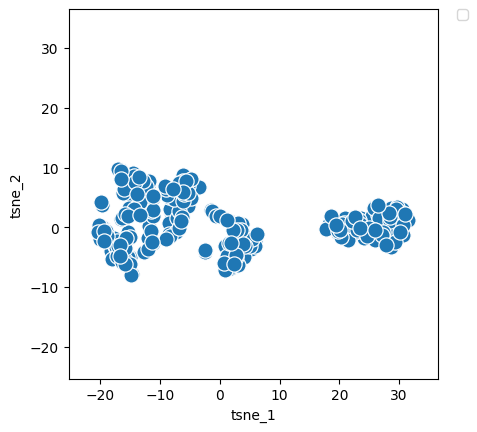

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1]})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', data=tsne_result_df, ax=ax,s=120)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

From the T-SNE plot, we can see that 3 or 4 clusters may exist

# Let's Apply k-means

In [36]:
from sklearn.cluster import KMeans

In [37]:
# Let's just confirm that  the data is normal distributed
pd.DataFrame(df).describe()

,0,1,2,3,4,5,6,7
count,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02
mean,3.266863e-16,1.837611e-16,6.891039e-17,1.174029e-16,-2.339550e-16,-2.041789e-16,4.083579e-17,1.293133e-16
std,1.001921e+00,1.001921e+00,1.001921e+00,1.001921e+00,1.001921e+00,1.001921e+00,1.001921e+00,1.001921e+00
min,-1.683385e+00,-1.497144e+00,-1.223544e+00,-1.493239e+00,-1.648229e+00,-2.598203e+00,-1.402393e+00,-1.833878e+00
25%,-7.997404e-01,-9.191048e-01,-9.197567e-01,-7.758132e-01,-8.918596e-01,-5.328295e-01,-6.888950e-01,-5.574989e-01
50%,-1.466117e-01,2.369740e-01,-4.134443e-01,-2.810368e-01,-1.248703e-01,1.556284e-01,2.460339e-02,7.188801e-01
75%,7.242265e-01,1.393053e+00,9.305848e-01,7.827325e-01,7.719173e-01,4.998573e-01,7.381017e-01,7.188801e-01
max,3.003774e+00,1.393053e+00,2.339054e+00,3.058704e+00,2.344835e+00,3.253689e+00,1.451600e+00,7.188801e-01


In [38]:
inertias = []
mapping2 = {}
K = range(1, 10)
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(df)
    kmeanModel.fit(df)

    inertias.append(kmeanModel.inertia_)

    mapping2[k] = kmeanModel.inertia_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

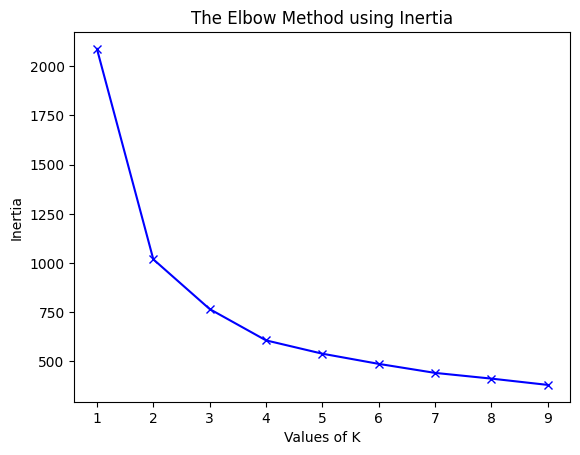

In [39]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [40]:
# plot data with 3 clusters
kmeanModel = KMeans(n_clusters=3).fit(df)
kmeanModel.fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [41]:
labels = kmeanModel.labels_

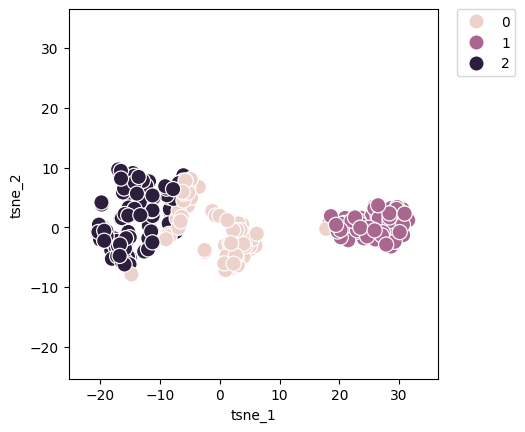

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label':labels})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2',hue='label', data=tsne_result_df, ax=ax,s=120)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

In [43]:
# Let's try with 4 clusters
